In [1]:
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
X = lfw_people.data
n_features = X.shape[1]

In [4]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [5]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [6]:
print("Total dataset size:")
print("n_samples: %d", n_samples)
print("n_features: %d", n_features)
print("n_classes: %d", n_classes)

Total dataset size:
n_samples: %d 1288
n_features: %d 1850
n_classes: %d 7


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train, X_test, y_train, y_test)

[[138.66667  147.33333  148.66667  ... 239.33333  247.66667  245.66667 ]
 [164.33333  142.66667  126.666664 ...  33.        38.666668  43.      ]
 [131.33333  132.33333  134.33333  ...  31.666666  31.333334  29.333334]
 ...
 [142.33333  133.33333  133.66667  ... 116.       118.       151.33333 ]
 [111.333336 115.666664 152.66667  ...  54.333332  49.666668  56.      ]
 [ 11.333333  13.666667  16.333334 ... 165.33333  182.       209.      ]] [[ 90.         85.         74.        ...  26.333334   26.666666
   28.666666 ]
 [113.666664  112.333336  128.66667   ...  21.333334    3.
    2.3333333]
 [ 68.        110.333336  127.333336  ... 172.33333   184.33333
  171.       ]
 ...
 [ 71.333336   81.         87.333336  ... 195.66667   213.
  227.       ]
 [ 31.333334   29.666666   30.333334  ... 151.66667   142.33333
  141.66667  ]
 [218.        228.66667   224.66667   ...  28.333334   40.333332
   53.       ]] [3 1 2 6 4 6 2 6 4 5 2 2 4 1 6 2 1 3 2 3 6 3 3 6 1 3 0 1 6 5 4 5 3 0 3 1 6
 3 6 2 3 

In [8]:
n_components = 50
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

In [9]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [10]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)


In [12]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)

Predicting the people names on the testing set


In [13]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.77      0.67        13
     Colin Powell       0.83      0.92      0.87        60
  Donald Rumsfeld       0.68      0.56      0.61        27
    George W Bush       0.87      0.90      0.88       146
Gerhard Schroeder       0.75      0.72      0.73        25
      Hugo Chavez       0.77      0.67      0.71        15
       Tony Blair       0.86      0.69      0.77        36

         accuracy                           0.82       322
        macro avg       0.76      0.75      0.75       322
     weighted avg       0.82      0.82      0.82       322



In [14]:
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[ 10   1   1   1   0   0   0]
 [  0  55   1   4   0   0   0]
 [  4   2  15   5   1   0   0]
 [  1   4   4 131   1   2   3]
 [  0   0   1   5  18   1   0]
 [  0   2   0   1   1  10   1]
 [  2   2   0   4   3   0  25]]


In [ ]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

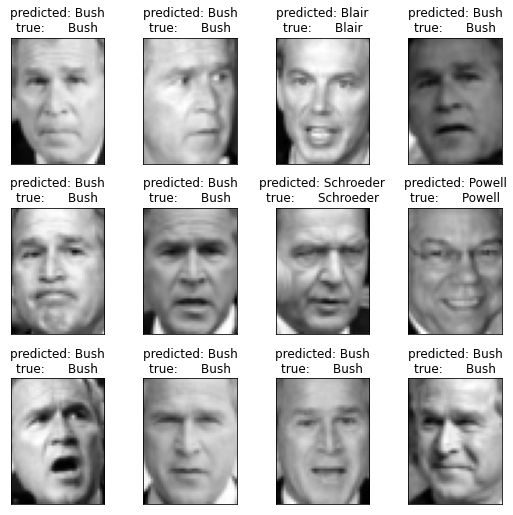

In [ ]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

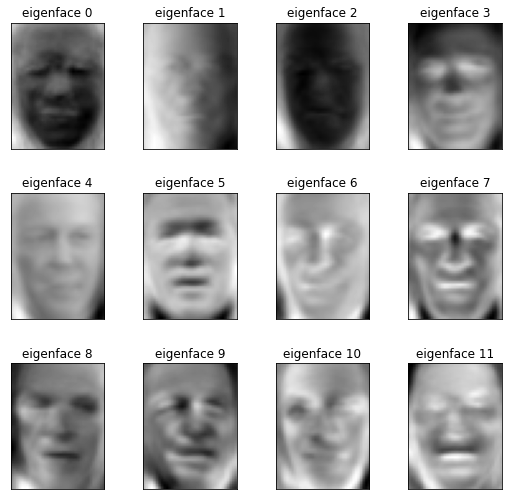

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8198757763975155
